# Analisis Data Airbnb Bangkok

Analisis ini bertujuan untuk memahami pola listing Airbnb di Bangkok, Thailand. Proyek ini mencakup langkah-langkah pembersihan data, visualisasi, dan penyusunan rekomendasi berbasis data.


#Latar Belakang
Pasar akomodasi alternatif, terutama melalui platform seperti Airbnb, telah menjadi pilihan populer bagi wisatawan. Bangkok, sebagai salah satu destinasi wisata utama di Asia Tenggara, memiliki permintaan tinggi terhadap akomodasi yang fleksibel dan terjangkau. Platform Airbnb memungkinkan pemilik properti untuk menawarkan berbagai pilihan kepada pengunjung, dari kamar tunggal hingga apartemen lengkap. Namun, meningkatnya jumlah penawaran properti ini membuat pemilik dan pengelola platform memerlukan pemahaman mendalam tentang faktor-faktor yang mempengaruhi permintaan dan harga sewa untuk mengoptimalkan penawaran mereka.

#Pernyataan Masalah
Bagaimana platform atau pemilik properti dapat memaksimalkan kinerja listing mereka di Airbnb Bangkok? Dengan memanfaatkan data dari listing Airbnb di Bangkok, penelitian ini bertujuan untuk menjawab:

1. Faktor-faktor apa yang paling mempengaruhi harga sewa dan tingkat hunian?
2. Bagaimana perbandingan kinerja listing berdasarkan lokasi yang ditawarkan?

Analisis ini akan membantu pemilik dan calon penyewa memahami karakteristik listing yang paling sukses dan relevan dengan preferensi wisatawan. Selain itu, analisis ini juga akan menyediakan insight bagi pengelola platform untuk memaksimalkan profitabilitas dan mengoptimalkan rekomendasi listing bagi pengunjung di Bangkok.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('/content/Airbnb Listings Bangkok.csv')

data.head()



,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


#DATA UNDERSTANDING DAN DATA CLEANING

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {data.shape}')
data.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

##MENANGANI MISSING VALUES

In [5]:
# persentase missing value di tiap kolom
data.isna().sum()/data.shape[0]*100

,0
Unnamed: 0,0.000000
id,0.000000
name,0.050460
host_id,0.000000
host_name,0.006308
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


<Axes: >

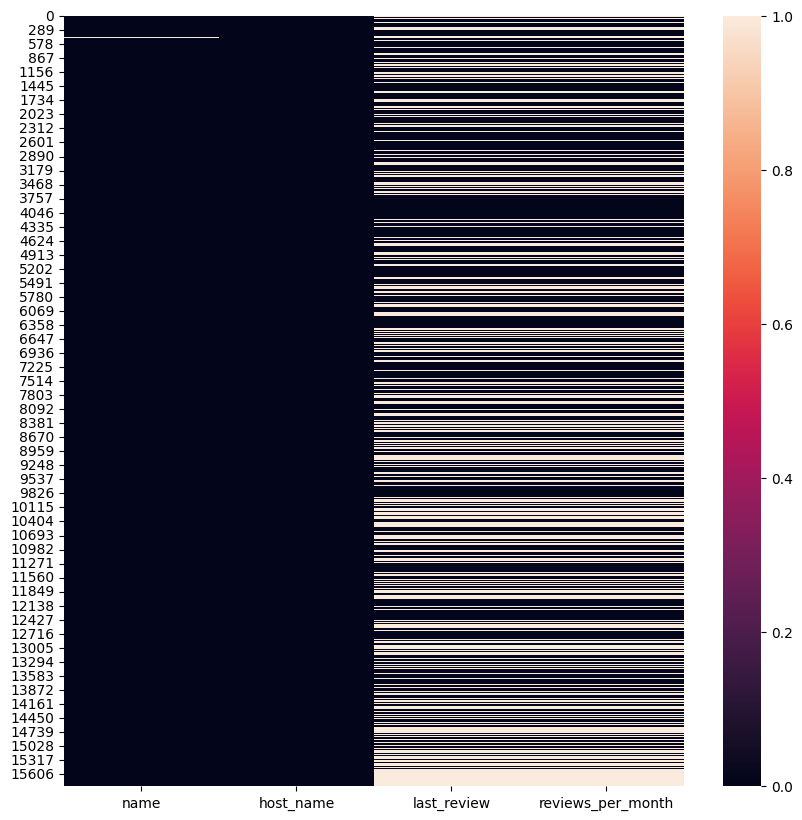

In [6]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(data[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

In [7]:
#Mengecek missing values
data[['name', 'host_name', 'last_review', 'reviews_per_month']].isna().sum()

,0
name,8
host_name,1
last_review,5790
reviews_per_month,5790


In [8]:
# Mengisi dengan nilai konstanta
data['name'].fillna('Unknown', inplace=True)
data['host_name'].fillna('Not provided', inplace=True)

# Mengisi last_review dengan metode forward fill
data['last_review'].fillna(method='ffill', inplace=True)

# Mengisi reviews_per_month dengan rata-rata
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace=True)

data.isna().sum()


,0
Unnamed: 0,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


##MENANGANI DUPLIKAT

In [9]:
# Mengecek duplikat
duplicates = data.duplicated().sum()
print(f'Total duplikat: {duplicates}')

# Menghapus duplikat
data.drop_duplicates(inplace=True)


Total duplikat: 0


##MENANGANI OUTLIERS

In [ ]:
# Menggunakan IQR untuk mendeteksi outliers pada kolom 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers
data_cleaned = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]

print(f'Total baris setelah menghapus outliers: {len(data_cleaned)}')


Total baris setelah menghapus outliers: 14451


##VISUALISASI DATA

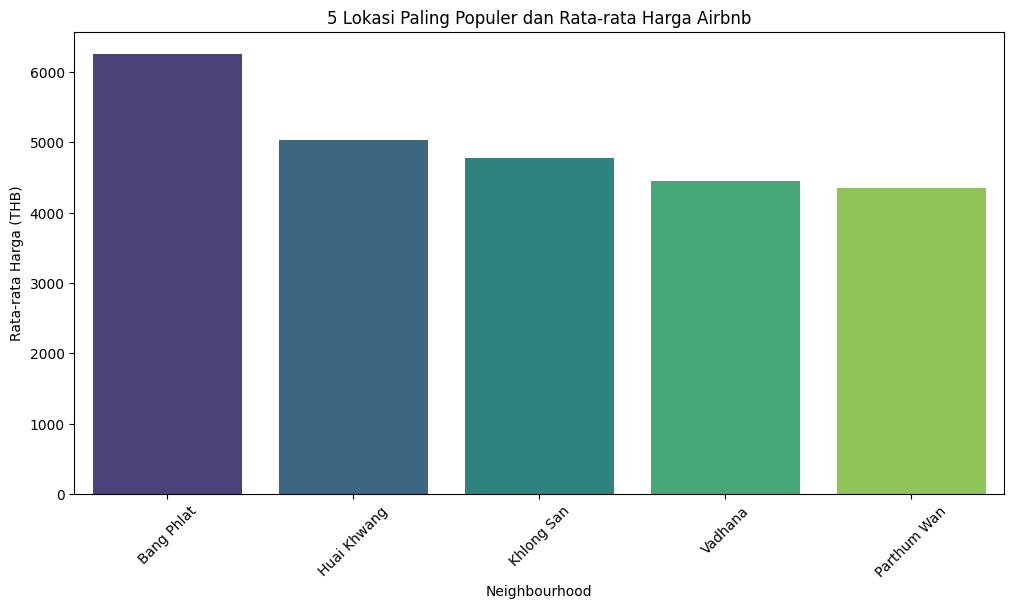

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata harga berdasarkan neighbourhood
average_price_by_neighbourhood = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Mengambil 5 lokasi teratas
top_neighbourhoods = average_price_by_neighbourhood.head(5)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='viridis')
plt.title('5 Lokasi Paling Populer dan Rata-rata Harga Airbnb')
plt.xlabel('Neighbourhood')
plt.ylabel('Rata-rata Harga (THB)')
plt.xticks(rotation=45)
plt.show()


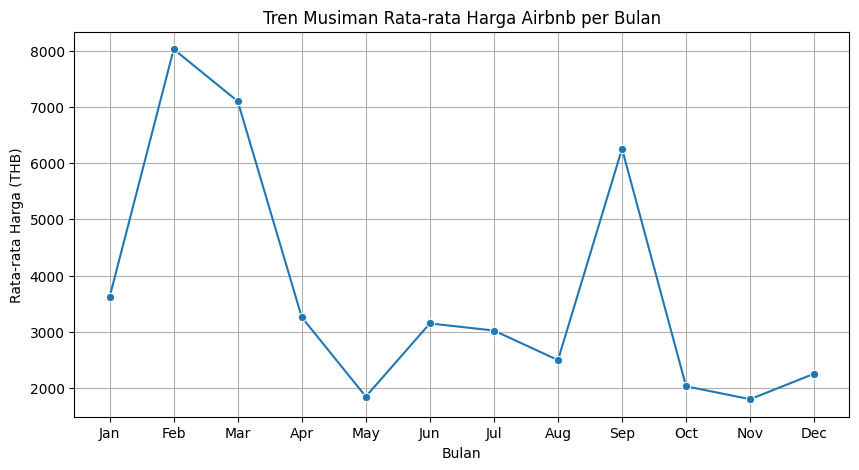

In [ ]:
# Mengonversi kolom date ke tipe datetime
data['last_review'] = pd.to_datetime(data['last_review'])

# Mengambil bulan dari tanggal
data['month'] = data['last_review'].dt.month

# Menghitung rata-rata harga per bulan
average_price_per_month = data.groupby('month')['price'].mean()

# Visualisasi tren musiman
plt.figure(figsize=(10, 5))
sns.lineplot(x=average_price_per_month.index, y=average_price_per_month.values, marker='o')
plt.title('Tren Musiman Rata-rata Harga Airbnb per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Harga (THB)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid()
plt.show()


A.
- Rata-rata harga Airbnb pada Bang Phlat sekitar 6000 Bath, dan termasuk rata-rata harga tertinggi. Sumbu X: 5 wilayah dengan rata-rata harga tertinggi.
- Sumbu X: 5 Wilayah dengan rata-rata harga tertinggi
- Sumbu Y: rata-rata harga dalam Bath

B.
- Sumbu X: Nama-nama bulan dalam setahun
- Sumbu Y: Rata-rata harga per bulan
- Harga rata-rata tertinggi terlihat pada bulan Februari di mana harga Airbnb meningkat di atas 8000 THB paling sedikit.
- Terjadinya penurunan sementara pada bulan Februari-Mei, kemudian meningkat lagi pada bulan Juni dan menurun lagi hingga bulan Agustus. Lalu terjadi peningkatan pada Bulan September dan menurun hingga bulan November.



#Kesimpulan

Dari kedua grafik tersebut, kita bisa menarik beberapa kesimpulan berikut:


- Grafik pertama menunjukkan lima wilayah di Bangkok dengan harga rata-rata Airbnb tertinggi. Bang Phlat adalah wilayah dengan rata-rata harga tertinggi, diikuti oleh Huai Khwang, Khlong San, Vadhana, dan Pathum Wan. Ini menunjukkan bahwa wilayah-wilayah tersebut mungkin merupakan area populer atau memiliki nilai properti lebih tinggi, sehingga menarik wisatawan dengan anggaran lebih besar.

- Grafik kedua memperlihatkan fluktuasi musiman harga Airbnb rata-rata per bulan. Harga tertinggi muncul pada bulan Februari dan September, sementara harga terendah tercatat pada Mei dan Oktober–November. Ini menunjukkan adanya pola musiman dalam harga sewa Airbnb di Bangkok.


- Wisatawan yang mencari harga lebih terjangkau dapat mempertimbangkan untuk mengunjungi Bangkok pada bulan Mei, Oktober, atau November.
- Pemilik Airbnb bisa memanfaatkan bulan-bulan dengan permintaan tinggi (Februari dan September) untuk menetapkan harga lebih tinggi dan meningkatkan pendapatan.